# Problem Statement-1
Customer churn is a big problem for
telecommunications companies. Indeed, their annual churn rates are usually
higher than 10%. For that reason, they develop strategies to keep as many
clients as possible. This is a classification project since the variable to be
predicted is binary (churn or loyal customer). The goal here is to model
churn probability, conditioned on the customer features

### Importing Libraries

In [97]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [98]:
df=pd.read_csv('Churn.csv')

In [99]:
df

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[5000 rows x 21 columns]

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [101]:
df.isna().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [102]:
df['day.charge']=pd.to_numeric(df['day.charge'],errors='coerce')
df['eve.mins']=pd.to_numeric(df['eve.mins'],errors='coerce')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      4993 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [104]:
df.isna().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [105]:
df2=df.dropna()
df2

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge  eve.mins  eve.calls  eve.charge  night.mins  \
0           110       45.07     197.4         99       16.78       244.7   
1           123       27.47     195.5        103       16.62       254.4   
2           114       41.38     121.2        110       10.30       162.6   
3            71       50.90      61.9         88        5.26       196.9   
4           113       28.34     148.3        122       12.61       186.9   
...         ...         ...       ...        ...         ...         ...   
4995        127       40.07     223.0        126       18.96       297.5   
4996         90       31.31     256.8         73       21.83       213.6   
4997         89       23.90     172.8        128       14.69       212.4   
4998         67       32.10     171.7         92       14.59       224.4   
4999        102       22.00     267.1        104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[4969 rows x 21 columns]

In [106]:
#df[df['day.charge']=='Nan']

In [107]:
#df[df['eve.mins']=='Nan']

In [108]:
#df=df[df['day.charge']!='Nan']
#df=df[df['eve.mins']!='Nan']
#df

In [109]:
df2=df2.rename({'Unnamed: 0' : 'Index'}, axis=1)

In [110]:
df2=df2.set_index("Index")

In [111]:
df2

state      area.code  account.length voice.plan  voice.messages  \
Index                                                                   
1        KS  area_code_415             128        yes              25   
2        OH  area_code_415             107        yes              26   
3        NJ  area_code_415             137         no               0   
4        OH  area_code_408              84         no               0   
5        OK  area_code_415              75         no               0   
...     ...            ...             ...        ...             ...   
4996     HI  area_code_408              50        yes              40   
4997     WV  area_code_415             152         no               0   
4998     DC  area_code_415              61         no               0   
4999     DC  area_code_510             109         no               0   
5000     VT  area_code_415              86        yes              34   

      intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
Index                                                                      
1            no       10.0           3         2.70     265.1        110   
2            no       13.7           3         3.70     161.6        123   
3            no       12.2           5         3.29     243.4        114   
4           yes        6.6           7         1.78     299.4         71   
5           yes       10.1           3         2.73     166.7        113   
...         ...        ...         ...          ...       ...        ...   
4996         no        9.9           5         2.67     235.7        127   
4997         no       14.7           2         3.97     184.2         90   
4998         no       13.6           4         3.67     140.6         89   
4999         no        8.5           6         2.30     188.8         67   
5000         no        9.3          16         2.51     129.4        102   

       day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
Index                                                                         
1           45.07     197.4         99       16.78       244.7           91   
2           27.47     195.5        103       16.62       254.4          103   
3           41.38     121.2        110       10.30       162.6          104   
4           50.90      61.9         88        5.26       196.9           89   
5           28.34     148.3        122       12.61       186.9          121   
...           ...       ...        ...         ...         ...          ...   
4996        40.07     223.0        126       18.96       297.5          116   
4997        31.31     256.8         73       21.83       213.6          113   
4998        23.90     172.8        128       14.69       212.4           97   
4999        32.10     171.7         92       14.59       224.4           89   
5000        22.00     267.1        104       22.70       154.8          100   

       night.charge  customer.calls churn  
Index                                      
1             11.01               1    no  
2             11.45               1    no  
3              7.32               0    no  
4              8.86               2    no  
5              8.41               3    no  
...             ...             ...   ...  
4996          13.39               2    no  
4997           9.61               3   yes  
4998           9.56               1    no  
4999          10.10               0    no  
5000           6.97               0    no  

[4969 rows x 20 columns]

In [112]:
df2.shape

(4969, 20)

In [113]:
df2.duplicated()

Index
1       False
2       False
3       False
4       False
5       False
        ...  
4996    False
4997    False
4998    False
4999    False
5000    False
Length: 4969, dtype: bool

In [114]:
df2.describe()

account.length  voice.messages    intl.mins   intl.calls  intl.charge  \
count     4969.000000     4969.000000  4969.000000  4969.000000  4969.000000   
mean       100.206681        7.754880    10.264198     4.433085     2.771851   
std         39.695476       13.545738     2.761996     2.459495     0.745672   
min          1.000000        0.000000     0.000000     0.000000     0.000000   
25%         73.000000        0.000000     8.500000     3.000000     2.300000   
50%        100.000000        0.000000    10.300000     4.000000     2.780000   
75%        127.000000       17.000000    12.000000     6.000000     3.240000   
max        243.000000       52.000000    20.000000    20.000000     5.400000   

          day.mins    day.calls   day.charge     eve.mins    eve.calls  \
count  4969.000000  4969.000000  4969.000000  4969.000000  4969.000000   
mean    180.306178   100.021936    30.652604   200.617368   100.174884   
std      53.931206    19.835965     9.168275    50.550590    19.833572   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     143.700000    87.000000    24.430000   166.400000    87.000000   
50%     180.100000   100.000000    30.620000   201.000000   100.000000   
75%     216.200000   113.000000    36.750000   234.100000   113.000000   
max     351.500000   165.000000    59.760000   363.700000   170.000000   

        eve.charge   night.mins  night.calls  night.charge  customer.calls  
count  4969.000000  4969.000000  4969.000000   4969.000000     4969.000000  
mean     17.052695   200.434675    99.954518      9.019670        1.571946  
std       4.296784    50.528158    19.959015      2.273776        1.307458  
min       0.000000     0.000000     0.000000      0.000000        0.000000  
25%      14.140000   167.100000    87.000000      7.520000        1.000000  
50%      17.090000   200.400000   100.000000      9.020000        1.000000  
75%      19.900000   234.700000   113.000000     10.560000        2.000000  
max      30.910000   395.000000   175.000000     17.770000        9.000000

<AxesSubplot:>

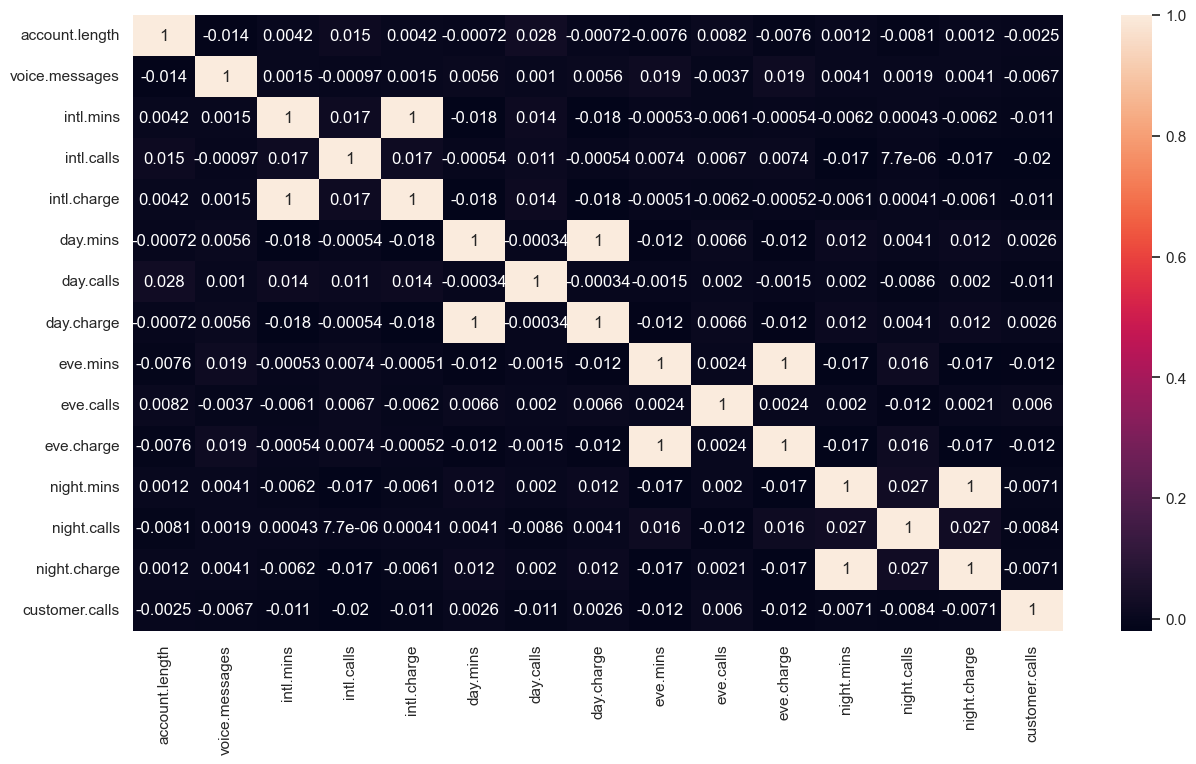

In [115]:
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(),annot=True)

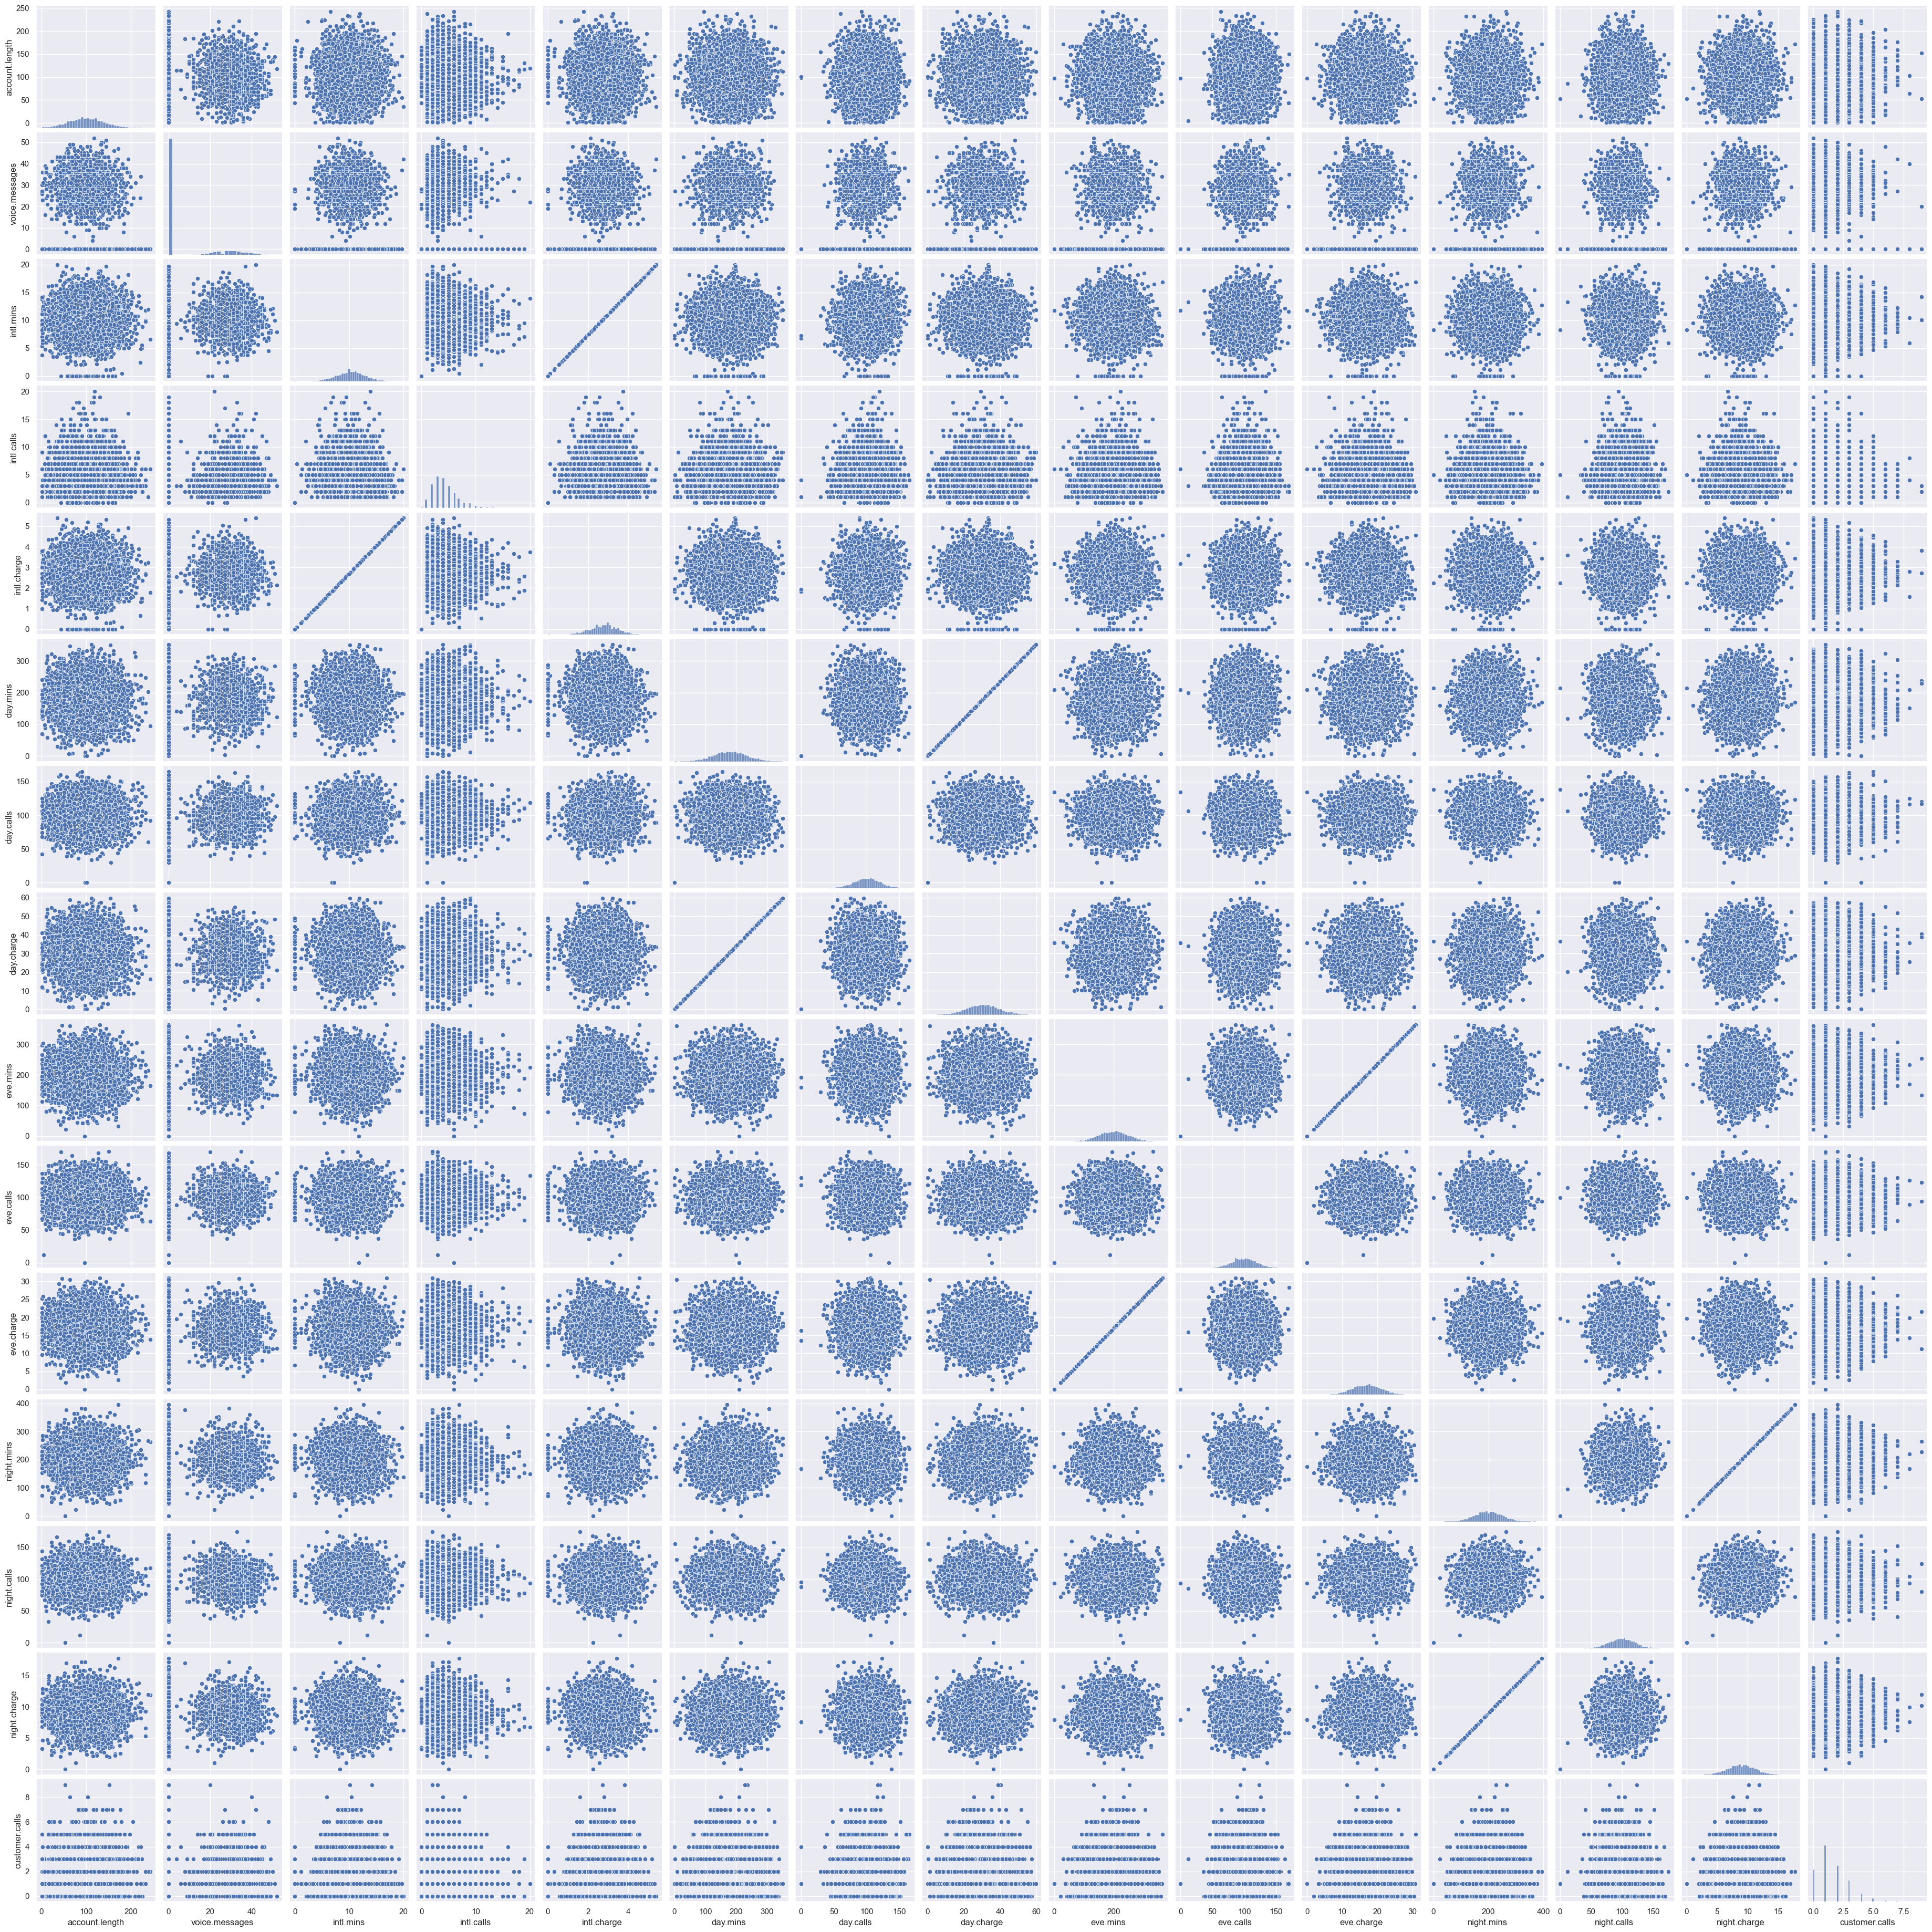

In [116]:
sns.set_style(style='darkgrid')
sns.pairplot(df2)

### Plotting % of churn and non-churn customers

In [117]:
Churn_check=df2['churn'].value_counts()

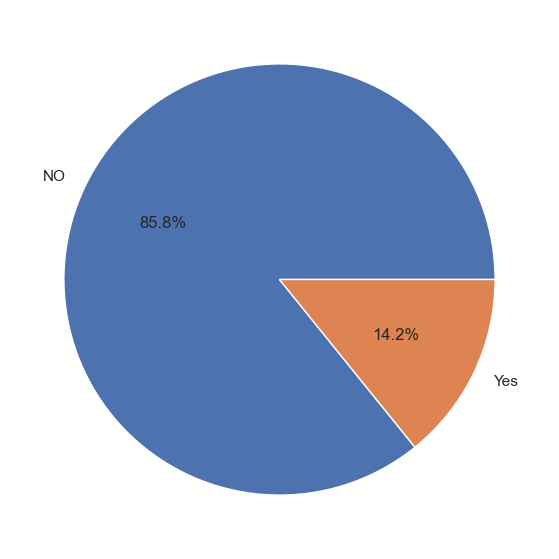

In [118]:
fig = plt.figure(figsize =(10, 7))
plt.pie(Churn_check, labels=['NO','Yes'], autopct='%1.1f%%')
plt.show()

In [119]:
#approximately 15% are churn customers 

In [120]:
state=df2['state'].value_counts()

In [121]:
state_name=np.unique(df2['state'])
state_name

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [1]:
plt.figure(figsize=(15,7))
sns.countplot(df2['state'])

NameError: name 'plt' is not defined

In [123]:
df2['area.code'].value_counts()

area_code_415    2479
area_code_408    1249
area_code_510    1241
Name: area.code, dtype: int64

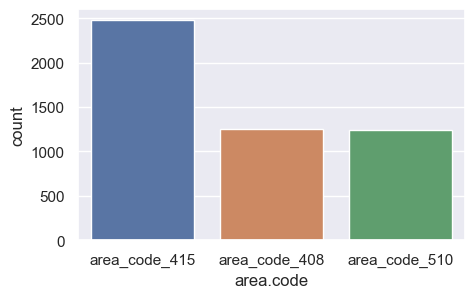

In [124]:
plt.figure(figsize=(5,3))
sns.countplot(df2['area.code'])
plt.show()

# Divided data into churn and not churn customers

In [125]:
chrn_df=df2[df2['churn']=='yes']

In [126]:
chrn_df

state      area.code  account.length voice.plan  voice.messages  \
Index                                                                   
11       IN  area_code_415              65         no               0   
16       NY  area_code_415             161         no               0   
22       CO  area_code_408              77         no               0   
34       AZ  area_code_408              12         no               0   
42       MD  area_code_408             135        yes              41   
...     ...            ...             ...        ...             ...   
4960     NM  area_code_408             137         no               0   
4981     WA  area_code_408              73         no               0   
4991     ND  area_code_510             140         no               0   
4992     AZ  area_code_510              97         no               0   
4997     WV  area_code_415             152         no               0   

      intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
Index                                                                      
11           no       12.7           6         3.43     129.1        137   
16           no        5.4           9         1.46     332.9         67   
22           no        5.7           6         1.54      62.4         89   
34           no       11.8           3         3.19     249.6        118   
42          yes       14.6          15         3.94     173.1         85   
...         ...        ...         ...          ...       ...        ...   
4960        yes       10.6           2         2.86     312.4        110   
4981         no       12.3           2         3.32     177.2        118   
4991         no        7.5           6         2.03     244.7        115   
4992         no        8.8           5         2.38     252.6         89   
4997         no       14.7           2         3.97     184.2         90   

       day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
Index                                                                         
11          21.95     228.5         83       19.42       208.8          111   
16          56.59     317.8         97       27.01       160.6          128   
22          10.61     169.9        121       14.44       209.6           64   
34          42.43     252.4        119       21.45       280.2           90   
42          29.43     203.9        107       17.33       122.2           78   
...           ...       ...        ...         ...         ...          ...   
4960        53.11     231.1         73       19.64       120.1           78   
4981        30.12     270.5         84       22.99       241.8          112   
4991        41.60     258.6        101       21.98       231.3          112   
4992        42.94     340.3         91       28.93       256.5           67   
4997        31.31     256.8         73       21.83       213.6          113   

       night.charge  customer.calls churn  
Index                                      
11             9.40               4   yes  
16             7.23               4   yes  
22             9.43               5   yes  
34            12.61               1   yes  
42             5.50               0   yes  
...             ...             ...   ...  
4960           5.40               1   yes  
4981          10.88               3   yes  
4991          10.41               1   yes  
4992          11.54               1   yes  
4997           9.61               3   yes  

[705 rows x 20 columns]

In [127]:
not_chrn_df=df[df['churn']=='no']

In [128]:
not_chrn_df

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4994        4995    NC  area_code_408              75         no   
4995        4996    HI  area_code_408              50        yes   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4994               0        no        6.9           7         1.86  ...   
4995              40        no        9.9           5         2.67  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge  eve.mins  eve.calls  eve.charge  night.mins  \
0           110       45.07     197.4         99       16.78       244.7   
1           123       27.47     195.5        103       16.62       254.4   
2           114       41.38     121.2        110       10.30       162.6   
3            71       50.90      61.9         88        5.26       196.9   
4           113       28.34     148.3        122       12.61       186.9   
...         ...         ...       ...        ...         ...         ...   
4994        101       29.02     193.1        126       16.41       129.1   
4995        127       40.07     223.0        126       18.96       297.5   
4997         89       23.90     172.8        128       14.69       212.4   
4998         67       32.10     171.7         92       14.59       224.4   
4999        102       22.00     267.1        104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4994          104          5.81               1     no  
4995          116         13.39               2     no  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[4293 rows x 21 columns]

In [129]:
chrn_df.describe()

account.length  voice.messages   intl.mins  intl.calls  intl.charge  \
count      705.000000      705.000000  705.000000  705.000000   705.000000   
mean       102.286525        4.470922   10.685532    4.151773     2.885589   
std         39.440226       11.280618    2.793873    2.553618     0.754249   
min          1.000000        0.000000    0.000000    0.000000     0.000000   
25%         76.000000        0.000000    8.800000    2.000000     2.380000   
50%        102.000000        0.000000   10.600000    4.000000     2.860000   
75%        126.000000        0.000000   12.800000    5.000000     3.460000   
max        225.000000       48.000000   20.000000   20.000000     5.400000   

         day.mins   day.calls  day.charge    eve.mins   eve.calls  eve.charge  \
count  705.000000  705.000000  705.000000  705.000000  705.000000  705.000000   
mean   207.886099  100.805674   35.341064  211.693617   99.904965   17.994099   
std     68.647123   20.758021   11.670205   51.623121   19.642133    4.387902   
min      0.000000    0.000000    0.000000   70.900000   48.000000    6.030000   
25%    153.400000   88.000000   26.080000  175.800000   86.000000   14.940000   
50%    215.900000  101.000000   36.700000  211.000000   99.000000   17.940000   
75%    266.600000  115.000000   45.320000  249.300000  114.000000   21.190000   
max    351.500000  165.000000   59.760000  363.700000  168.000000   30.910000   

       night.mins  night.calls  night.charge  customer.calls  
count  705.000000   705.000000    705.000000      705.000000  
mean   206.086667    99.624113      9.273986        2.258156  
std     49.755075    19.961162      2.239022        1.817300  
min     47.400000    42.000000      2.130000        0.000000  
25%    171.700000    85.000000      7.730000        1.000000  
50%    206.300000   100.000000      9.280000        2.000000  
75%    241.000000   114.000000     10.850000        4.000000  
max    381.600000   158.000000     17.170000        9.000000

In [130]:
not_chrn_df.describe()

Unnamed: 0  account.length  voice.messages    intl.mins   intl.calls  \
count  4293.000000     4293.000000     4293.000000  4293.000000  4293.000000   
mean   2496.300955       99.917074        8.291870    10.190869     4.481947   
std    1450.444952       39.737531       13.809408     2.749994     2.438233   
min       1.000000        1.000000        0.000000     0.000000     0.000000   
25%    1224.000000       73.000000        0.000000     8.500000     3.000000   
50%    2493.000000       99.000000        0.000000    10.300000     4.000000   
75%    3760.000000      127.000000       20.000000    12.000000     6.000000   
max    5000.000000      243.000000       52.000000    19.700000    19.000000   

       intl.charge     day.mins    day.calls   day.charge     eve.mins  \
count  4293.000000  4293.000000  4293.000000  4286.000000  4271.000000   
mean      2.752055   175.746564    99.899604    29.880698   198.745891   
std       0.742443    49.634575    19.674019     8.442350    50.145914   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   142.900000    87.000000    24.300000   164.500000   
50%       2.780000   178.000000   100.000000    30.260000   199.500000   
75%       3.240000   210.700000   113.000000    35.820000   232.250000   
max       5.320000   315.600000   163.000000    53.650000   361.800000   

         eve.calls   eve.charge   night.mins  night.calls  night.charge  \
count  4293.000000  4293.000000  4293.000000  4293.000000   4293.000000   
mean    100.241556    16.898654   199.455113    99.975775      8.975593   
std      19.862391     4.262900    50.609570    19.958820      2.277438   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      87.000000    13.980000   165.900000    87.000000      7.470000   
50%     101.000000    16.960000   199.000000   100.000000      8.960000   
75%     114.000000    19.750000   233.400000   113.000000     10.500000   
max     170.000000    30.750000   395.000000   175.000000     17.770000   

       customer.calls  
count     4293.000000  
mean         1.457722  
std          1.164236  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          8.000000

### Visualization Of Churn & Loyal Customer

In [131]:
#State

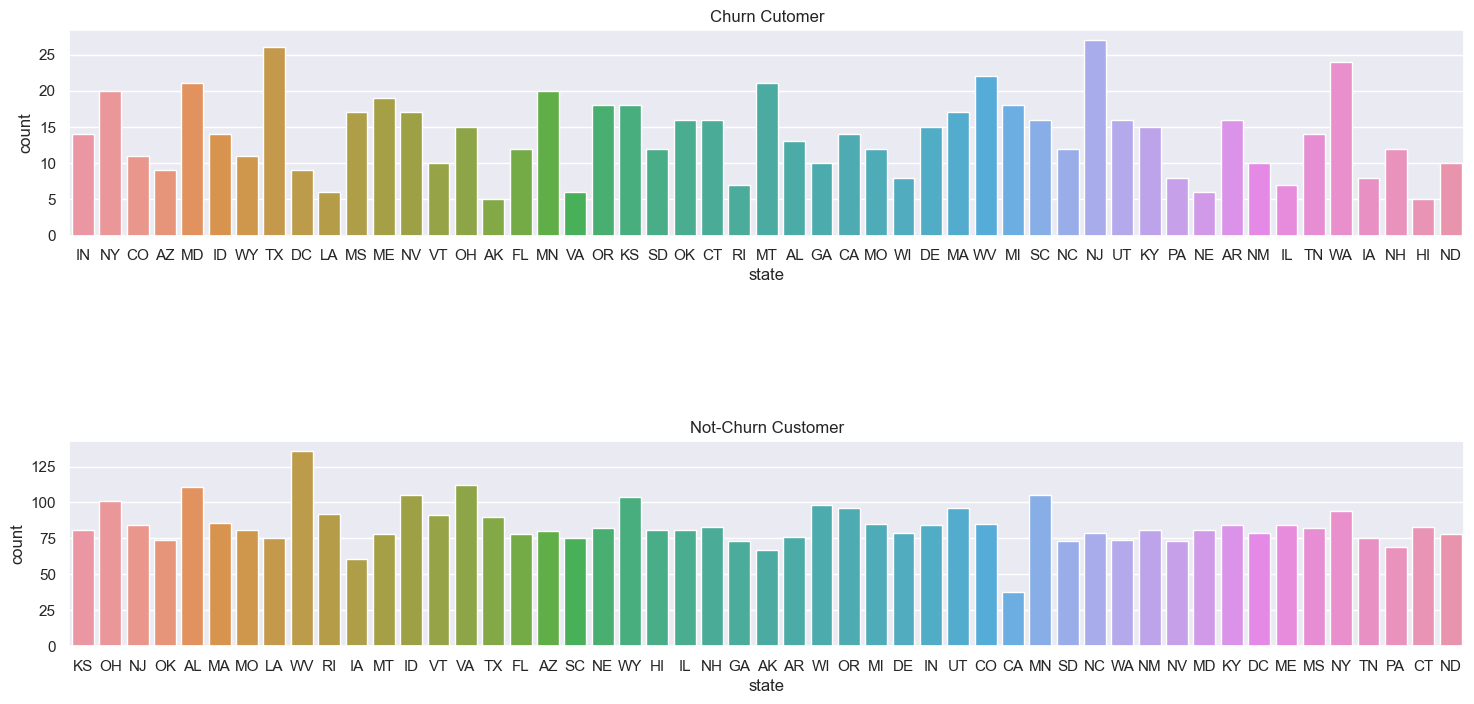

In [132]:
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.title("Churn Cutomer")
sns.countplot(chrn_df['state'])
plt.subplot(2,1,2)
plt.title("Not-Churn Customer")
sns.countplot(not_chrn_df['state'])
plt.subplots_adjust(hspace=1)

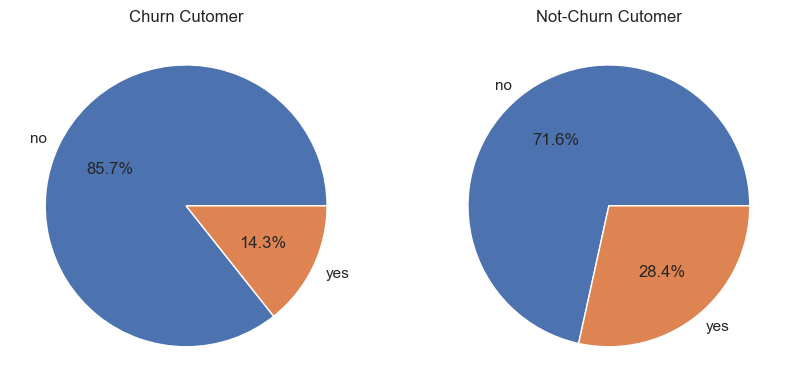

In [133]:
#Voice.Plan
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Churn Cutomer")
plt.pie(chrn_df['voice.plan'].value_counts(), labels=['no','yes'], autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Not-Churn Cutomer")
plt.pie(not_chrn_df['voice.plan'].value_counts(), labels=['no','yes'], autopct='%1.1f%%')
plt.subplots_adjust(hspace=1)

In [134]:
not_chrn_df['customer.calls'].value_counts()

1    1596
2    1005
0     902
3     592
4     141
5      38
6      12
7       6
8       1
Name: customer.calls, dtype: int64

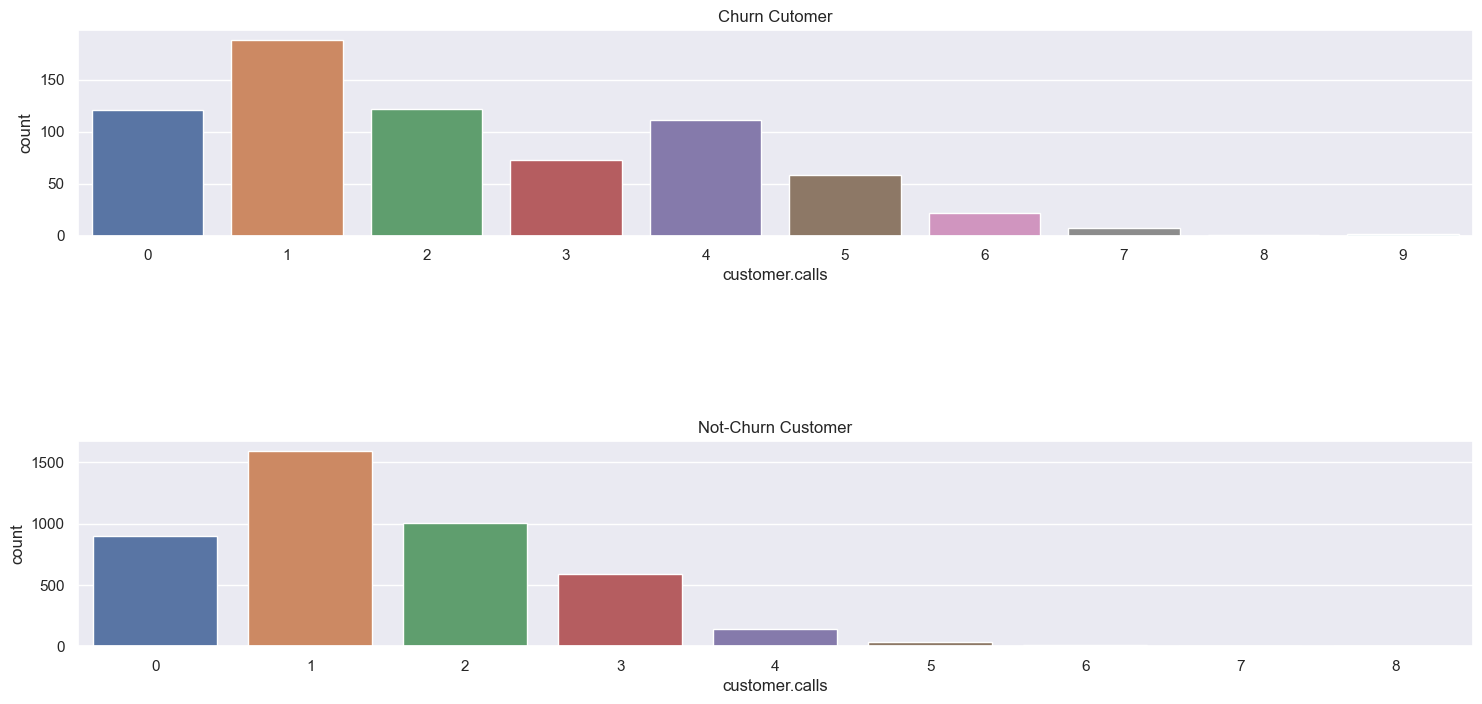

In [135]:
#Customer.calls
plt.figure(figsize=(18,8))
plt.subplot(2,1,1)
plt.title("Churn Cutomer")
sns.countplot(chrn_df['customer.calls'])
plt.subplot(2,1,2)
plt.title("Not-Churn Customer")
sns.countplot(not_chrn_df['customer.calls'])
plt.subplots_adjust(hspace=1)
# show plot
plt.show()

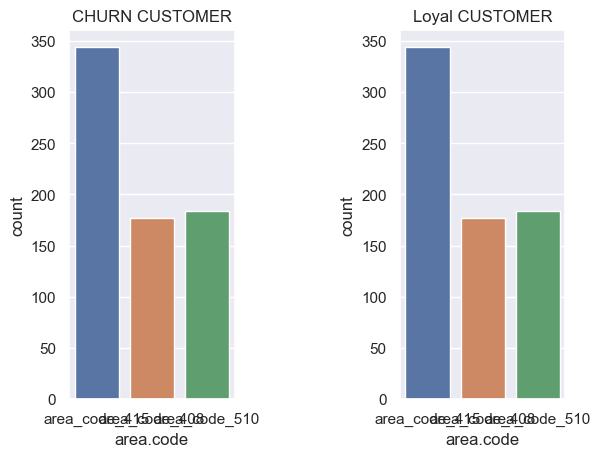

In [136]:
plt.subplot(1,2,1)
sns.countplot(chrn_df['area.code'])
plt.title("CHURN CUSTOMER")

plt.subplot(1,2,2)
sns.countplot(chrn_df['area.code'])
plt.title("Loyal CUSTOMER")
plt.subplots_adjust(wspace=1,)


Text(0.5, 1.0, 'NON-CHURN CUSTOMER')

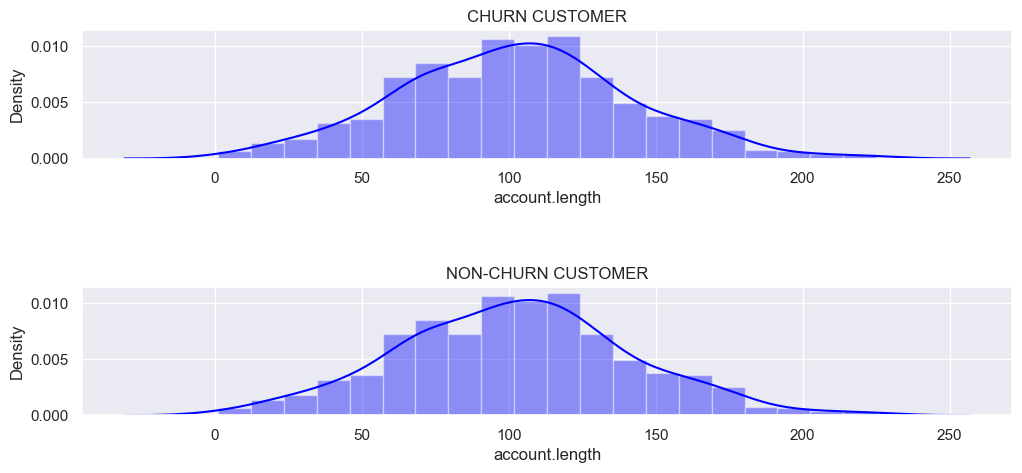

In [137]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)

sns.distplot(chrn_df["account.length"],color="blue")
plt.title("CHURN CUSTOMER")


plt.subplot(2,1,2)
sns.distplot(chrn_df["account.length"],color="blue")
plt.subplots_adjust(hspace=1)
plt.title("NON-CHURN CUSTOMER")

Text(0.5, 1.0, 'NON-CHURN CUSTOMER')

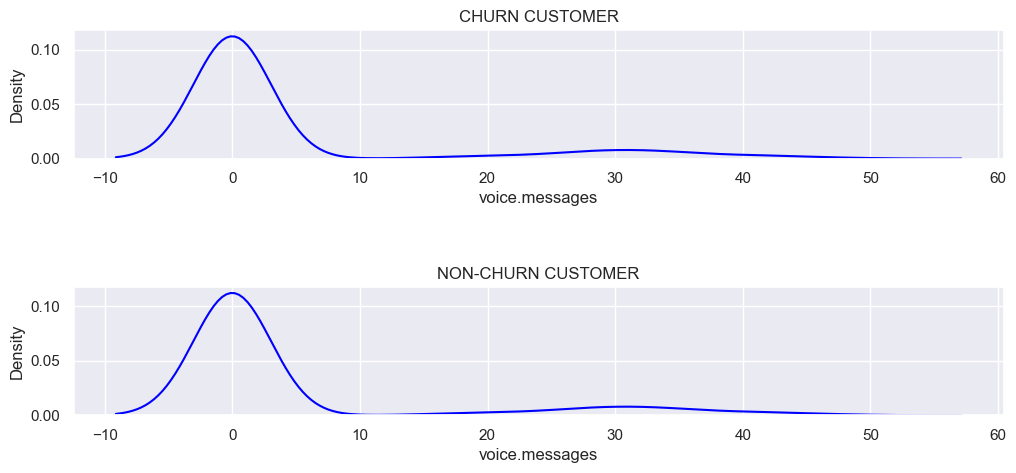

In [138]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)

sns.kdeplot(chrn_df["voice.messages"],color="blue")
plt.title("CHURN CUSTOMER")


plt.subplot(2,1,2)
sns.kdeplot(chrn_df["voice.messages"],color="blue")
plt.subplots_adjust(hspace=1)
plt.title("NON-CHURN CUSTOMER")

Text(0.5, 1.0, 'NON-CHURN CUSTOMER')

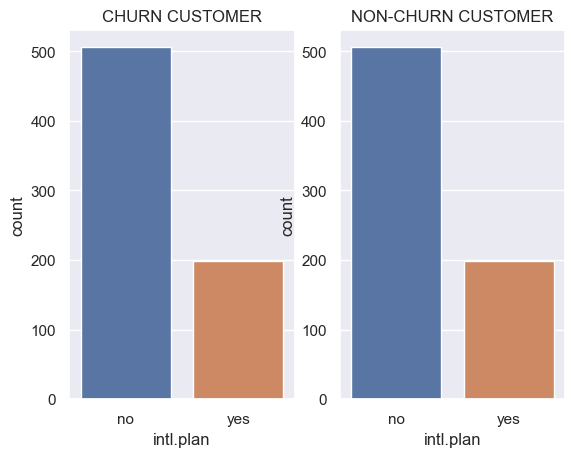

In [139]:
#International plan
plt.subplot(1,2,1)
sns.countplot(chrn_df["intl.plan"])
plt.title("CHURN CUSTOMER")
plt.subplot(1,2,2)
sns.countplot(chrn_df["intl.plan"])
plt.title("NON-CHURN CUSTOMER")

In [140]:
chrn_df.head()

state      area.code  account.length voice.plan  voice.messages  \
Index                                                                   
11       IN  area_code_415              65         no               0   
16       NY  area_code_415             161         no               0   
22       CO  area_code_408              77         no               0   
34       AZ  area_code_408              12         no               0   
42       MD  area_code_408             135        yes              41   

      intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
Index                                                                      
11           no       12.7           6         3.43     129.1        137   
16           no        5.4           9         1.46     332.9         67   
22           no        5.7           6         1.54      62.4         89   
34           no       11.8           3         3.19     249.6        118   
42          yes       14.6          15         3.94     173.1         85   

       day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
Index                                                                         
11          21.95     228.5         83       19.42       208.8          111   
16          56.59     317.8         97       27.01       160.6          128   
22          10.61     169.9        121       14.44       209.6           64   
34          42.43     252.4        119       21.45       280.2           90   
42          29.43     203.9        107       17.33       122.2           78   

       night.charge  customer.calls churn  
Index                                      
11             9.40               4   yes  
16             7.23               4   yes  
22             9.43               5   yes  
34            12.61               1   yes  
42             5.50               0   yes

In [141]:
not_chrn_df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71       50.90   
4       yes       10.1           3         2.73  ...        113       28.34   

   eve.mins  eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0     197.4         99       16.78       244.7           91         11.01   
1     195.5        103       16.62       254.4          103         11.45   
2     121.2        110       10.30       162.6          104          7.32   
3      61.9         88        5.26       196.9           89          8.86   
4     148.3        122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1     no  
1               1     no  
2               0     no  
3               2     no  
4               3     no  

[5 rows x 21 columns]

In [142]:
churn_calls_mean=chrn_df[["intl.calls","day.calls","eve.calls","night.calls"]]
not_churn_calls_mean=not_chrn_df[["intl.calls","day.calls","eve.calls","night.calls"]]

In [143]:
churn_calls_mean_df=churn_calls_mean.mean()
not_churn_calls_mean_df=not_churn_calls_mean.mean()

In [144]:
churn_calls_mean_df

intl.calls       4.151773
day.calls      100.805674
eve.calls       99.904965
night.calls     99.624113
dtype: float64

In [145]:
not_churn_calls_mean_df

intl.calls       4.481947
day.calls       99.899604
eve.calls      100.241556
night.calls     99.975775
dtype: float64

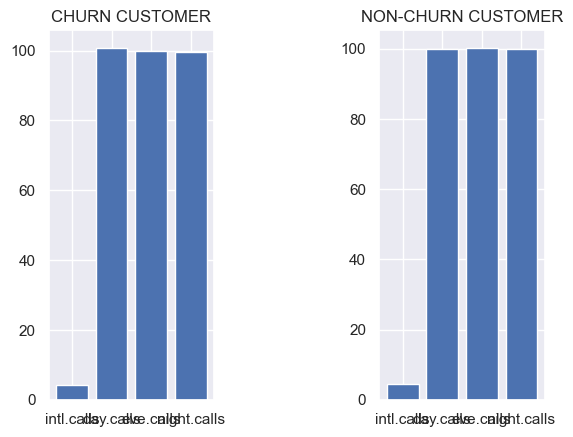

In [146]:
plt.subplot(1,2,1)

plt.bar(("intl.calls","day.calls","eve.calls","night.calls"),churn_calls_mean_df)
plt.title("CHURN CUSTOMER")
plt.subplot(1,2,2)

plt.bar(("intl.calls","day.calls","eve.calls","night.calls"),not_churn_calls_mean_df)
plt.title("NON-CHURN CUSTOMER")
plt.subplots_adjust(wspace=1,)

In [147]:
churn_mins_mean=chrn_df[["intl.mins","day.mins","eve.mins","night.mins"]]
not_churn_mins_mean=not_chrn_df[["intl.mins","day.mins","eve.mins","night.mins"]]

In [148]:
churn_mins_mean_df=churn_mins_mean.mean()
not_churn_mins_mean_df=not_churn_mins_mean.mean()

In [149]:
churn_mins_mean_df

intl.mins      10.685532
day.mins      207.886099
eve.mins      211.693617
night.mins    206.086667
dtype: float64

In [150]:
not_churn_mins_mean_df

intl.mins      10.190869
day.mins      175.746564
eve.mins      198.745891
night.mins    199.455113
dtype: float64

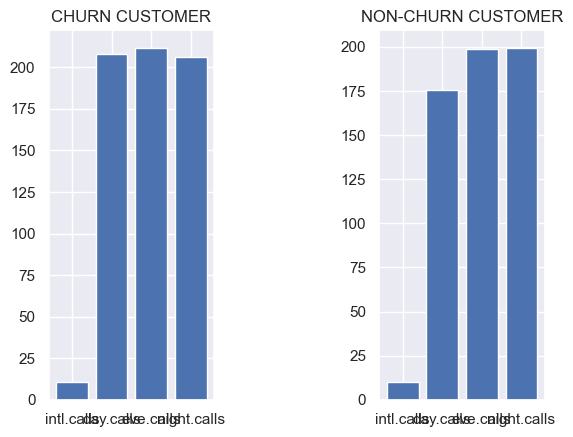

In [151]:
plt.subplot(1,2,1)

plt.bar(("intl.calls","day.calls","eve.calls","night.calls"),churn_mins_mean_df)
plt.title("CHURN CUSTOMER")
plt.subplot(1,2,2)

plt.bar(("intl.calls","day.calls","eve.calls","night.calls"),not_churn_mins_mean_df)
plt.title("NON-CHURN CUSTOMER")
plt.subplots_adjust(wspace=1,)

In [152]:
churn_charge_mean=chrn_df[["intl.charge","day.charge","eve.charge","night.charge"]]
not_churn_charge_mean=not_chrn_df[["intl.charge","day.charge","eve.charge","night.charge"]]

In [153]:
churn_charge_mean_df=churn_charge_mean.mean()
not_churn_charge_mean_df=not_churn_charge_mean.mean()

In [154]:
churn_charge_mean_df

intl.charge      2.885589
day.charge      35.341064
eve.charge      17.994099
night.charge     9.273986
dtype: float64

In [155]:
not_churn_charge_mean_df

intl.charge      2.752055
day.charge      29.880698
eve.charge      16.898654
night.charge     8.975593
dtype: float64

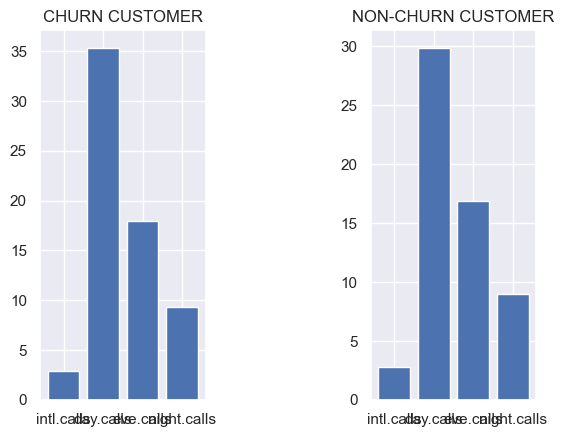

In [156]:
plt.subplot(1,2,1)

plt.bar(("intl.calls","day.calls","eve.calls","night.calls"),churn_charge_mean_df)
plt.title("CHURN CUSTOMER")
plt.subplot(1,2,2)

plt.bar(("intl.calls","day.calls","eve.calls","night.calls"),not_churn_charge_mean_df)
plt.title("NON-CHURN CUSTOMER")
plt.subplots_adjust(wspace=1,)

In [157]:
df2

state      area.code  account.length voice.plan  voice.messages  \
Index                                                                   
1        KS  area_code_415             128        yes              25   
2        OH  area_code_415             107        yes              26   
3        NJ  area_code_415             137         no               0   
4        OH  area_code_408              84         no               0   
5        OK  area_code_415              75         no               0   
...     ...            ...             ...        ...             ...   
4996     HI  area_code_408              50        yes              40   
4997     WV  area_code_415             152         no               0   
4998     DC  area_code_415              61         no               0   
4999     DC  area_code_510             109         no               0   
5000     VT  area_code_415              86        yes              34   

      intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
Index                                                                      
1            no       10.0           3         2.70     265.1        110   
2            no       13.7           3         3.70     161.6        123   
3            no       12.2           5         3.29     243.4        114   
4           yes        6.6           7         1.78     299.4         71   
5           yes       10.1           3         2.73     166.7        113   
...         ...        ...         ...          ...       ...        ...   
4996         no        9.9           5         2.67     235.7        127   
4997         no       14.7           2         3.97     184.2         90   
4998         no       13.6           4         3.67     140.6         89   
4999         no        8.5           6         2.30     188.8         67   
5000         no        9.3          16         2.51     129.4        102   

       day.charge  eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
Index                                                                         
1           45.07     197.4         99       16.78       244.7           91   
2           27.47     195.5        103       16.62       254.4          103   
3           41.38     121.2        110       10.30       162.6          104   
4           50.90      61.9         88        5.26       196.9           89   
5           28.34     148.3        122       12.61       186.9          121   
...           ...       ...        ...         ...         ...          ...   
4996        40.07     223.0        126       18.96       297.5          116   
4997        31.31     256.8         73       21.83       213.6          113   
4998        23.90     172.8        128       14.69       212.4           97   
4999        32.10     171.7         92       14.59       224.4           89   
5000        22.00     267.1        104       22.70       154.8          100   

       night.charge  customer.calls churn  
Index                                      
1             11.01               1    no  
2             11.45               1    no  
3              7.32               0    no  
4              8.86               2    no  
5              8.41               3    no  
...             ...             ...   ...  
4996          13.39               2    no  
4997           9.61               3   yes  
4998           9.56               1    no  
4999          10.10               0    no  
5000           6.97               0    no  

[4969 rows x 20 columns]

In [158]:
df2.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

In [159]:
df2=df2.drop('state', axis=1)
df2=df2.drop('area.code', axis=1)

In [160]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [161]:
df2['voice.plan']=LE.fit_transform(df2['voice.plan'])
df2['intl.plan']=LE.fit_transform(df2['intl.plan'])
df2['churn']=LE.fit_transform(df2['churn'])

In [162]:
df2

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
Index                                                                     
1                 128           1              25          0       10.0   
2                 107           1              26          0       13.7   
3                 137           0               0          0       12.2   
4                  84           0               0          1        6.6   
5                  75           0               0          1       10.1   
...               ...         ...             ...        ...        ...   
4996               50           1              40          0        9.9   
4997              152           0               0          0       14.7   
4998               61           0               0          0       13.6   
4999              109           0               0          0        8.5   
5000               86           1              34          0        9.3   

       intl.calls  intl.charge  day.mins  day.calls  day.charge  eve.mins  \
Index                                                                       
1               3         2.70     265.1        110       45.07     197.4   
2               3         3.70     161.6        123       27.47     195.5   
3               5         3.29     243.4        114       41.38     121.2   
4               7         1.78     299.4         71       50.90      61.9   
5               3         2.73     166.7        113       28.34     148.3   
...           ...          ...       ...        ...         ...       ...   
4996            5         2.67     235.7        127       40.07     223.0   
4997            2         3.97     184.2         90       31.31     256.8   
4998            4         3.67     140.6         89       23.90     172.8   
4999            6         2.30     188.8         67       32.10     171.7   
5000           16         2.51     129.4        102       22.00     267.1   

       eve.calls  eve.charge  night.mins  night.calls  night.charge  \
Index                                                                 
1             99       16.78       244.7           91         11.01   
2            103       16.62       254.4          103         11.45   
3            110       10.30       162.6          104          7.32   
4             88        5.26       196.9           89          8.86   
5            122       12.61       186.9          121          8.41   
...          ...         ...         ...          ...           ...   
4996         126       18.96       297.5          116         13.39   
4997          73       21.83       213.6          113          9.61   
4998         128       14.69       212.4           97          9.56   
4999          92       14.59       224.4           89         10.10   
5000         104       22.70       154.8          100          6.97   

       customer.calls  churn  
Index                         
1                   1      0  
2                   1      0  
3                   0      0  
4                   2      0  
5                   3      0  
...               ...    ...  
4996                2      0  
4997                3      1  
4998                1      0  
4999                0      0  
5000                0      0  

[4969 rows x 18 columns]

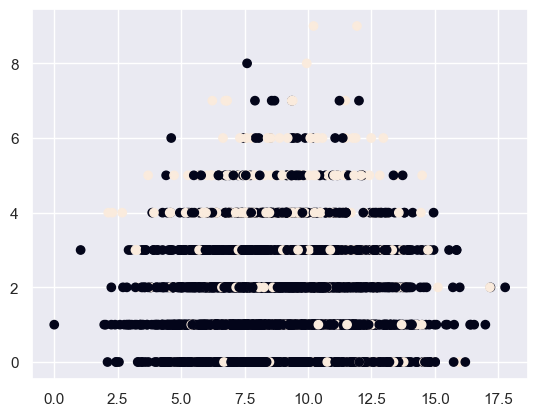

In [163]:
plt.scatter(df2['night.charge'],df2['customer.calls'], c=df2['churn'])

In [164]:
df3=df2.drop(['intl.charge','day.charge','eve.charge','night.charge'], axis=1)
df3

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
Index                                                                     
1                 128           1              25          0       10.0   
2                 107           1              26          0       13.7   
3                 137           0               0          0       12.2   
4                  84           0               0          1        6.6   
5                  75           0               0          1       10.1   
...               ...         ...             ...        ...        ...   
4996               50           1              40          0        9.9   
4997              152           0               0          0       14.7   
4998               61           0               0          0       13.6   
4999              109           0               0          0        8.5   
5000               86           1              34          0        9.3   

       intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
Index                                                                     
1               3     265.1        110     197.4         99       244.7   
2               3     161.6        123     195.5        103       254.4   
3               5     243.4        114     121.2        110       162.6   
4               7     299.4         71      61.9         88       196.9   
5               3     166.7        113     148.3        122       186.9   
...           ...       ...        ...       ...        ...         ...   
4996            5     235.7        127     223.0        126       297.5   
4997            2     184.2         90     256.8         73       213.6   
4998            4     140.6         89     172.8        128       212.4   
4999            6     188.8         67     171.7         92       224.4   
5000           16     129.4        102     267.1        104       154.8   

       night.calls  customer.calls  churn  
Index                                      
1               91               1      0  
2              103               1      0  
3              104               0      0  
4               89               2      0  
5              121               3      0  
...            ...             ...    ...  
4996           116               2      0  
4997           113               3      1  
4998            97               1      0  
4999            89               0      0  
5000           100               0      0  

[4969 rows x 14 columns]

In [165]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
scale=MinMaxScaler()

In [167]:
data=scale.fit_transform(df3)
data

array([[0.52479339, 1.        , 0.48076923, ..., 0.52      , 0.11111111,
        0.        ],
       [0.43801653, 1.        , 0.5       , ..., 0.58857143, 0.11111111,
        0.        ],
       [0.56198347, 0.        , 0.        , ..., 0.59428571, 0.        ,
        0.        ],
       ...,
       [0.24793388, 0.        , 0.        , ..., 0.55428571, 0.11111111,
        0.        ],
       [0.44628099, 0.        , 0.        , ..., 0.50857143, 0.        ,
        0.        ],
       [0.35123967, 1.        , 0.65384615, ..., 0.57142857, 0.        ,
        0.        ]])

In [168]:
data=pd.DataFrame(data,columns=df3.columns)
data

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0           0.524793         1.0        0.480769        0.0      0.500   
1           0.438017         1.0        0.500000        0.0      0.685   
2           0.561983         0.0        0.000000        0.0      0.610   
3           0.342975         0.0        0.000000        1.0      0.330   
4           0.305785         0.0        0.000000        1.0      0.505   
...              ...         ...             ...        ...        ...   
4964        0.202479         1.0        0.769231        0.0      0.495   
4965        0.623967         0.0        0.000000        0.0      0.735   
4966        0.247934         0.0        0.000000        0.0      0.680   
4967        0.446281         0.0        0.000000        0.0      0.425   
4968        0.351240         1.0        0.653846        0.0      0.465   

      intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
0           0.15  0.754196   0.666667  0.542755   0.582353    0.619494   
1           0.15  0.459744   0.745455  0.537531   0.605882    0.644051   
2           0.25  0.692461   0.690909  0.333242   0.647059    0.411646   
3           0.35  0.851778   0.430303  0.170195   0.517647    0.498481   
4           0.15  0.474253   0.684848  0.407754   0.717647    0.473165   
...          ...       ...        ...       ...        ...         ...   
4964        0.25  0.670555   0.769697  0.613143   0.741176    0.753165   
4965        0.10  0.524040   0.545455  0.706076   0.429412    0.540759   
4966        0.20  0.400000   0.539394  0.475117   0.752941    0.537722   
4967        0.30  0.537127   0.406061  0.472092   0.541176    0.568101   
4968        0.80  0.368137   0.618182  0.734396   0.611765    0.391899   

      night.calls  customer.calls  churn  
0        0.520000        0.111111    0.0  
1        0.588571        0.111111    0.0  
2        0.594286        0.000000    0.0  
3        0.508571        0.222222    0.0  
4        0.691429        0.333333    0.0  
...           ...             ...    ...  
4964     0.662857        0.222222    0.0  
4965     0.645714        0.333333    1.0  
4966     0.554286        0.111111    0.0  
4967     0.508571        0.000000    0.0  
4968     0.571429        0.000000    0.0  

[4969 rows x 14 columns]

In [169]:
#splitting the data into train and test

In [170]:
data.head()

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0        0.524793         1.0        0.480769        0.0      0.500   
1        0.438017         1.0        0.500000        0.0      0.685   
2        0.561983         0.0        0.000000        0.0      0.610   
3        0.342975         0.0        0.000000        1.0      0.330   
4        0.305785         0.0        0.000000        1.0      0.505   

   intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
0        0.15  0.754196   0.666667  0.542755   0.582353    0.619494   
1        0.15  0.459744   0.745455  0.537531   0.605882    0.644051   
2        0.25  0.692461   0.690909  0.333242   0.647059    0.411646   
3        0.35  0.851778   0.430303  0.170195   0.517647    0.498481   
4        0.15  0.474253   0.684848  0.407754   0.717647    0.473165   

   night.calls  customer.calls  churn  
0     0.520000        0.111111    0.0  
1     0.588571        0.111111    0.0  
2     0.594286        0.000000    0.0  
3     0.508571        0.222222    0.0  
4     0.691429        0.333333    0.0

In [171]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [172]:
X

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0           0.524793         1.0        0.480769        0.0      0.500   
1           0.438017         1.0        0.500000        0.0      0.685   
2           0.561983         0.0        0.000000        0.0      0.610   
3           0.342975         0.0        0.000000        1.0      0.330   
4           0.305785         0.0        0.000000        1.0      0.505   
...              ...         ...             ...        ...        ...   
4964        0.202479         1.0        0.769231        0.0      0.495   
4965        0.623967         0.0        0.000000        0.0      0.735   
4966        0.247934         0.0        0.000000        0.0      0.680   
4967        0.446281         0.0        0.000000        0.0      0.425   
4968        0.351240         1.0        0.653846        0.0      0.465   

      intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
0           0.15  0.754196   0.666667  0.542755   0.582353    0.619494   
1           0.15  0.459744   0.745455  0.537531   0.605882    0.644051   
2           0.25  0.692461   0.690909  0.333242   0.647059    0.411646   
3           0.35  0.851778   0.430303  0.170195   0.517647    0.498481   
4           0.15  0.474253   0.684848  0.407754   0.717647    0.473165   
...          ...       ...        ...       ...        ...         ...   
4964        0.25  0.670555   0.769697  0.613143   0.741176    0.753165   
4965        0.10  0.524040   0.545455  0.706076   0.429412    0.540759   
4966        0.20  0.400000   0.539394  0.475117   0.752941    0.537722   
4967        0.30  0.537127   0.406061  0.472092   0.541176    0.568101   
4968        0.80  0.368137   0.618182  0.734396   0.611765    0.391899   

      night.calls  customer.calls  
0        0.520000        0.111111  
1        0.588571        0.111111  
2        0.594286        0.000000  
3        0.508571        0.222222  
4        0.691429        0.333333  
...           ...             ...  
4964     0.662857        0.222222  
4965     0.645714        0.333333  
4966     0.554286        0.111111  
4967     0.508571        0.000000  
4968     0.571429        0.000000  

[4969 rows x 13 columns]

In [173]:
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4964    0.0
4965    1.0
4966    0.0
4967    0.0
4968    0.0
Name: churn, Length: 4969, dtype: float64

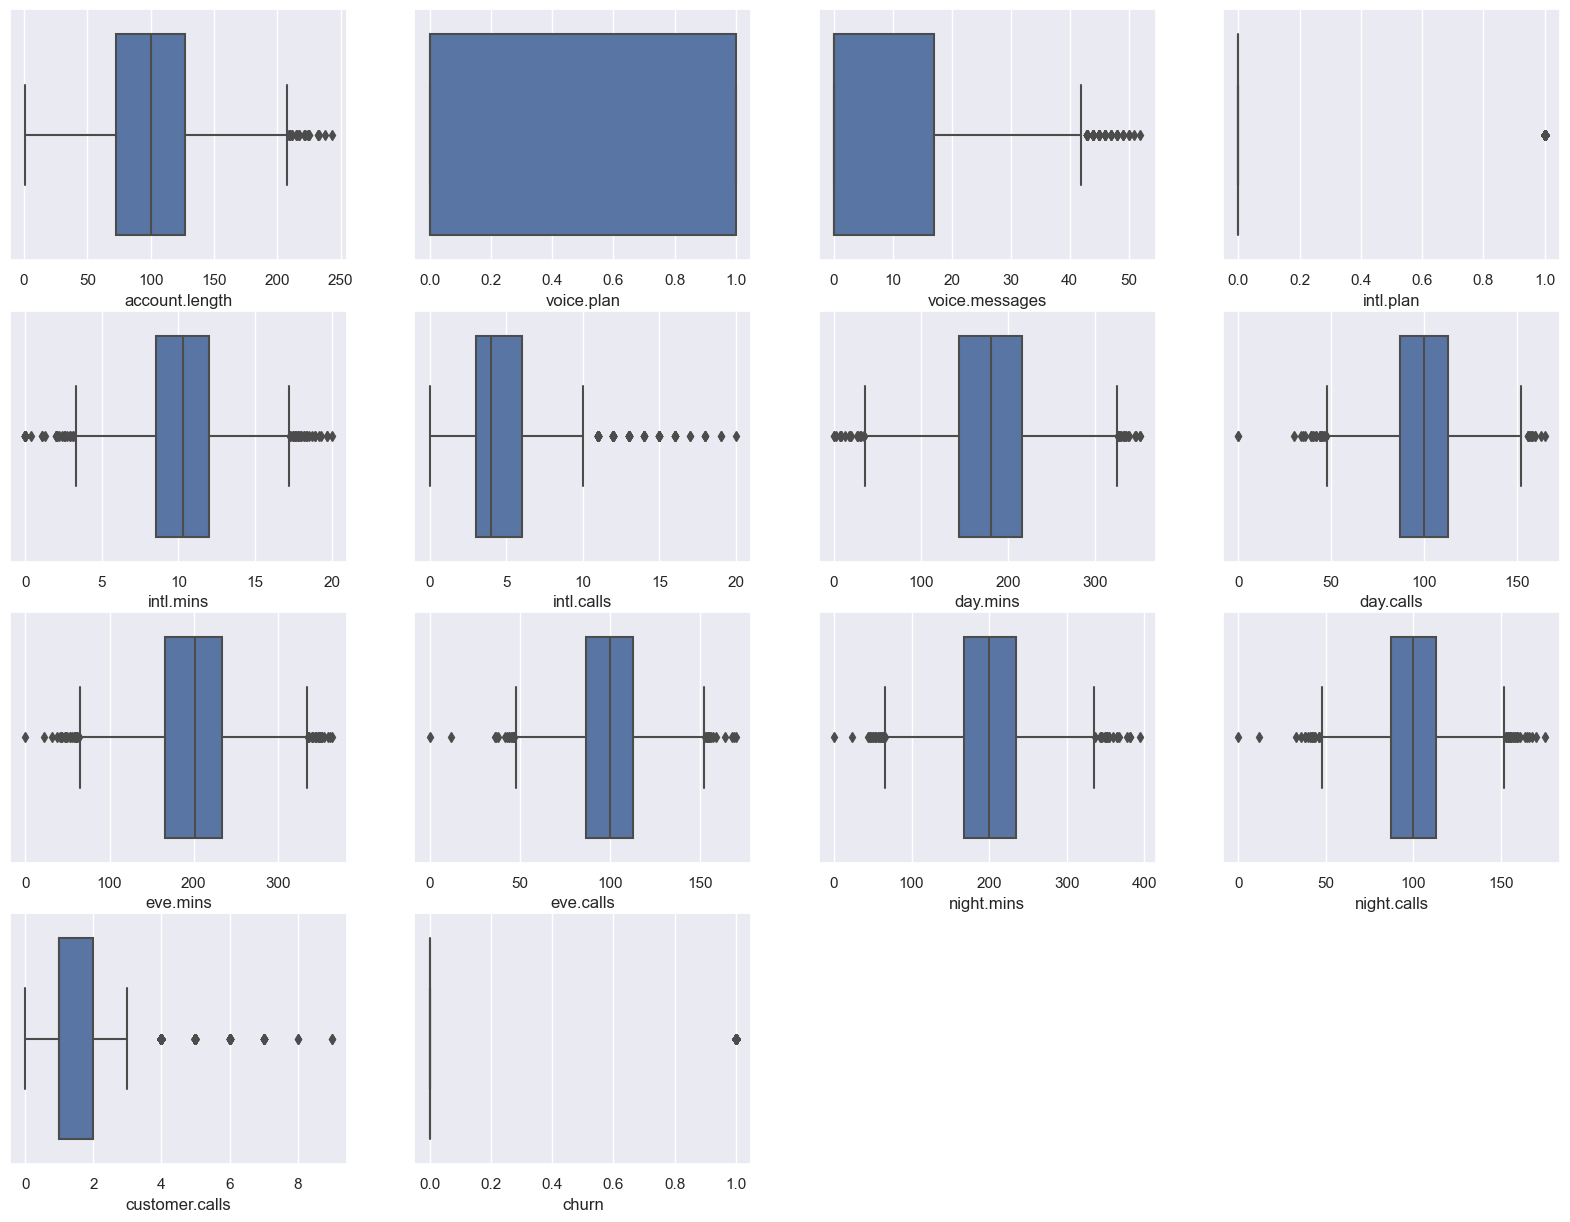

In [174]:
plt.figure(figsize=(20,15))
for i in range(len(df3.columns)):
    plt.subplot(4,4,i+1)
    sns.boxplot(df3[df3.columns[i]])
plt.show()

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=7)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3726, 13), (1243, 13), (3726,), (1243,))

In [177]:
x_train

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
895         0.735537         0.0        0.000000        0.0      0.525   
3212        0.355372         1.0        0.634615        0.0      0.510   
4877        0.743802         1.0        0.307692        0.0      0.485   
2686        0.475207         1.0        0.461538        0.0      0.300   
127         0.334711         0.0        0.000000        0.0      0.355   
...              ...         ...             ...        ...        ...   
4307        0.425620         0.0        0.000000        0.0      0.650   
2550        0.644628         0.0        0.000000        0.0      0.425   
537         0.495868         1.0        0.596154        0.0      0.505   
1220        0.557851         0.0        0.000000        1.0      0.455   
4271        0.330579         1.0        0.634615        0.0      0.775   

      intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
895         0.20  0.817354   0.745455  0.791861   0.670588    0.673418   
3212        0.35  0.355619   0.600000  0.646962   0.476471    0.545063   
4877        0.05  0.557610   0.515152  0.294473   0.700000    0.521266   
2686        0.15  0.522333   0.836364  0.560352   0.529412    0.422532   
127         0.05  0.569844   0.581818  0.553203   0.600000    0.521772   
...          ...       ...        ...       ...        ...         ...   
4307        0.15  0.531437   0.618182  0.484740   0.670588    0.562532   
2550        0.25  0.526600   0.557576  0.585648   0.500000    0.496456   
537         0.25  0.674538   0.381818  0.565301   0.688235    0.497975   
1220        0.50  0.730583   0.545455  0.632664   0.611765    0.363544   
4271        0.20  0.569844   0.624242  0.596371   0.564706    0.632405   

      night.calls  customer.calls  
895      0.640000        0.000000  
3212     0.542857        0.222222  
4877     0.628571        0.111111  
2686     0.508571        0.222222  
127      0.342857        0.444444  
...           ...             ...  
4307     0.480000        0.000000  
2550     0.485714        0.222222  
537      0.485714        0.444444  
1220     0.468571        0.333333  
4271     0.571429        0.111111  

[3726 rows x 13 columns]

In [178]:
x_test

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
3178        0.454545         0.0        0.000000        0.0      0.540   
2063        0.433884         1.0        0.711538        0.0      0.530   
2234        0.409091         0.0        0.000000        0.0      0.470   
735         0.086777         1.0        0.442308        0.0      0.635   
427         0.462810         0.0        0.000000        0.0      0.675   
...              ...         ...             ...        ...        ...   
3507        0.338843         0.0        0.000000        0.0      0.585   
4368        0.958678         0.0        0.000000        0.0      0.490   
590         0.214876         0.0        0.000000        0.0      0.580   
3269        0.301653         0.0        0.000000        0.0      0.450   
4798        0.173554         1.0        0.750000        0.0      0.540   

      intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
3178        0.15  0.838407   0.545455  0.810008   0.423529    0.658481   
2063        0.25  0.635846   0.630303  0.646412   0.582353    0.354684   
2234        0.25  0.600000   0.515152  0.905417   0.405882    0.321772   
735         0.20  0.518065   0.569697  0.452571   0.347059    0.326076   
427         0.15  0.440967   0.563636  0.908991   0.623529    0.479494   
...          ...       ...        ...       ...        ...         ...   
3507        0.20  0.380939   0.496970  0.466318   0.617647    0.564051   
4368        0.20  0.390612   0.569697  0.638988   0.511765    0.521519   
590         0.30  0.163585   0.575758  0.729997   0.770588    0.618481   
3269        0.10  0.579801   0.466667  0.563926   0.652941    0.392152   
4798        0.10  0.564723   0.630303  0.448447   0.629412    0.537215   

      night.calls  customer.calls  
3178     0.691429        0.111111  
2063     0.514286        0.222222  
2234     0.445714        0.444444  
735      0.582857        0.333333  
427      0.702857        0.111111  
...           ...             ...  
3507     0.651429        0.000000  
4368     0.600000        0.111111  
590      0.731429        0.333333  
3269     0.622857        0.111111  
4798     0.714286        0.111111  

[1243 rows x 13 columns]

In [179]:
y_train

895     1.0
3212    0.0
4877    0.0
2686    0.0
127     0.0
       ... 
4307    0.0
2550    0.0
537     0.0
1220    0.0
4271    0.0
Name: churn, Length: 3726, dtype: float64

In [180]:
y_test

3178    1.0
2063    0.0
2234    0.0
735     0.0
427     0.0
       ... 
3507    0.0
4368    0.0
590     0.0
3269    0.0
4798    0.0
Name: churn, Length: 1243, dtype: float64

In [183]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [186]:
#APPLYING RANDOM FOREST
num_trees = 100
max_features = 13

#train and test
model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
model.fit(x_train,y_train)

pred=model.predict(x_test)

print(classification_report(y_test,pred))


results = cross_val_score(model, x_train, y_train, cv=10)
print(results.mean())

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1074
         1.0       0.93      0.77      0.84       169

    accuracy                           0.96      1243
   macro avg       0.95      0.88      0.91      1243
weighted avg       0.96      0.96      0.96      1243

0.9519653204185765


In [187]:
df3

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
Index                                                                     
1                 128           1              25          0       10.0   
2                 107           1              26          0       13.7   
3                 137           0               0          0       12.2   
4                  84           0               0          1        6.6   
5                  75           0               0          1       10.1   
...               ...         ...             ...        ...        ...   
4996               50           1              40          0        9.9   
4997              152           0               0          0       14.7   
4998               61           0               0          0       13.6   
4999              109           0               0          0        8.5   
5000               86           1              34          0        9.3   

       intl.calls  day.mins  day.calls  eve.mins  eve.calls  night.mins  \
Index                                                                     
1               3     265.1        110     197.4         99       244.7   
2               3     161.6        123     195.5        103       254.4   
3               5     243.4        114     121.2        110       162.6   
4               7     299.4         71      61.9         88       196.9   
5               3     166.7        113     148.3        122       186.9   
...           ...       ...        ...       ...        ...         ...   
4996            5     235.7        127     223.0        126       297.5   
4997            2     184.2         90     256.8         73       213.6   
4998            4     140.6         89     172.8        128       212.4   
4999            6     188.8         67     171.7         92       224.4   
5000           16     129.4        102     267.1        104       154.8   

       night.calls  customer.calls  churn  
Index                                      
1               91               1      0  
2              103               1      0  
3              104               0      0  
4               89               2      0  
5              121               3      0  
...            ...             ...    ...  
4996           116               2      0  
4997           113               3      1  
4998            97               1      0  
4999            89               0      0  
5000           100               0      0  

[4969 rows x 14 columns]

In [188]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [190]:
#RANDOM FOREST WITH SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train a random forest classifier on the resampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test data
accuracy = rf.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.69%


In [194]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [195]:
#APPLYING SVM
clf = SVC(kernel="rbf",gamma=0.0001)

clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

print(classification_report(y_test, y_pred))

Accuracy = 86.40386162510056
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      1074
         1.0       0.00      0.00      0.00       169

    accuracy                           0.86      1243
   macro avg       0.43      0.50      0.46      1243
weighted avg       0.75      0.86      0.80      1243



In [196]:
#APPLYING SVM WITH SMOTE
# Use SMOTE to balance the training data
sm = SMOTE(sampling_strategy='minority', random_state=0)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_res, y_train_res)

# Make predictions on the testing data
y_pred = svm.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7602574416733708


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# fit the random forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X, Y)

# calculate the feature importances
importances = model.feature_importances_

# sort the features by their importances
sorted_index = importances.argsort()[::-1]

# plot the feature importances
plt.barh(X.columns[sorted_index], importances[sorted_index])
plt.xlabel("Feature Importance")
plt.title("Feature Importance of the Features")
plt.show()

In [ ]:
X = df3.drop("churn", axis=1)

# initialize the scaler
scaler = MinMaxScaler()

# fit and transform the data using the scaler
X_scaled = scaler.fit_transform(X)

# plot the original data and the scaled data
plt.plot(X.values[:,0], label="Original")
plt.plot(X_scaled[:,0], label="Scaled")
plt.xlabel("Data Points")
plt.ylabel("Value")
plt.title("Original vs Scaled Data")
plt.legend()
plt.show()




